# 3.6 高通（锐化）频域滤波器
## 3.6.1 高通滤波函数

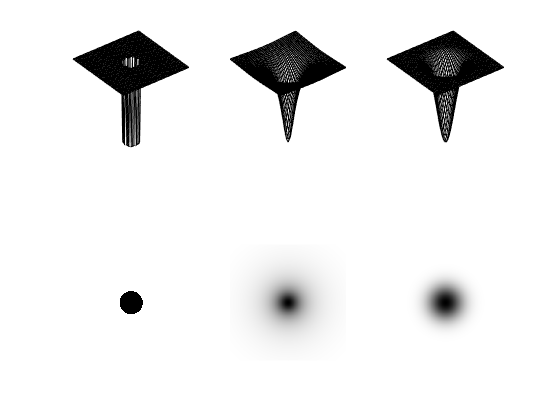

In [17]:
H = fftshift(hpfilter('ideal', 500, 500, 50));
subplot(231)
mesh(double(H(1:10:500, 1:10:500)));
axis tight
colormap([0 0 0])
axis off

J = fftshift(hpfilter('btw', 500, 500, 50));
subplot(232)
mesh(double(J(1:10:500, 1:10:500)));
axis tight
colormap([0 0 0])
axis off

K = fftshift(hpfilter('gaussian', 500, 500, 50));
subplot(233)
mesh(double(K(1:10:500, 1:10:500)));
axis tight
colormap([0 0 0])
axis off

subplot(234), imshow(H, []);
subplot(235), imshow(J, []);
subplot(236), imshow(K, []);

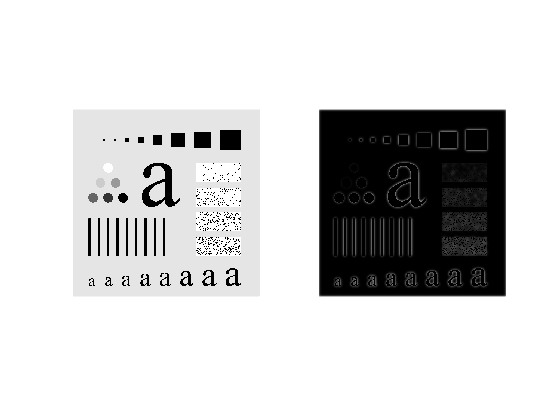

In [18]:
f = imread('Fig0318(a).tif');
PQ = paddedsize(size(f));
D0 = 0.05 * PQ(1);
H = hpfilter('gaussian', PQ(1), PQ(2), D0);
g = dftfilt(f, H);
subplot(121), imshow(f);
subplot(122), imshow(g);

## 3.6.2 高频强调滤波

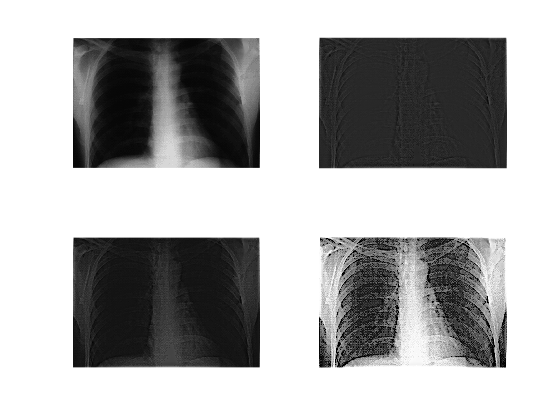

In [20]:
f = imread('Fig0319(a).tif');
PQ = paddedsize(size(f));
D0 = 0.05 * PQ(1);
HBW = hpfilter('btw', PQ(1), PQ(2), D0, 2);
H = 0.5 + 2 * HBW;
gbw = dftfilt(f, HBW, 'fltpoint');
gbw = gscale(gbw);
ghf = dftfilt(f, H, 'fltpoint');
ghf = gscale(ghf);
ghe = histeq(ghf, 256);
subplot(221), imshow(f);
subplot(222), imshow(gbw, []);
subplot(223), imshow(ghf, []);
subplot(224), imshow(ghe, []);